In [ ]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
pd.options.mode.chained_assignment = None

In [5]:
class_df.columns

Index(['Timestamp', 'Ethnicity', 'What year were you born?',
       'What is your gender?', 'What is your sexuality?',
       'Political Alignment', 'Religion', 'What's your hometown?',
       'Which country was your parent/guardian 1 born?',
       'Which country was your parent/guardian 2 born?',
       'Highest Parent Education',
       'Did at least one of your parents pursue a degree/career in STEM?',
       'Were you in a specialized high school program?',
       'What was your top 6 highschool average for engineering? Please enter just the number with NO % sign (Calc, Adv Functions, English, Physics, Chemistry, 6th course in your top 6) ',
       'What university would you go to if you were not going to Waterloo?',
       'Out of the previously mentioned universities, were you accepted or rejected from your program? If you did not apply to the university, indicate as such [Carleton University]',
       'Out of the previously mentioned universities, were you accepted or rejected 

In [ ]:
relevant_cols = ['What is your favourite programming language?', 'What is your salary (in CAD/h, do not include "$")?']
lang_pay = class_df[relevant_cols]
lang_pay.head(10)

In [ ]:
lang_pay = lang_pay[lang_pay['What is your salary (in CAD/h, do not include "$")?'].notna()]
lang_pay.head(10)

In [ ]:
def remove_bad_salaries(row):
    salary = row['What is your salary (in CAD/h, do not include "$")?']
    if salary > 100 or salary < 10:
        return None
    else:
        return row

lang_pay = lang_pay.apply(remove_bad_salaries, axis="columns").dropna()
lang_pay.head(10)

In [ ]:
lang_pay.loc[lang_pay['What is your favourite programming language?'] == 'Swift', 'What is your favourite programming language?'] = 'Swift and Kotlin'

lang_pay.loc[lang_pay['What is your favourite programming language?'] == 'Kotlin', 'What is your favourite programming language?'] = 'Swift and Kotlin'

lang_pay.head(10)

[(10.0, 30.0)]

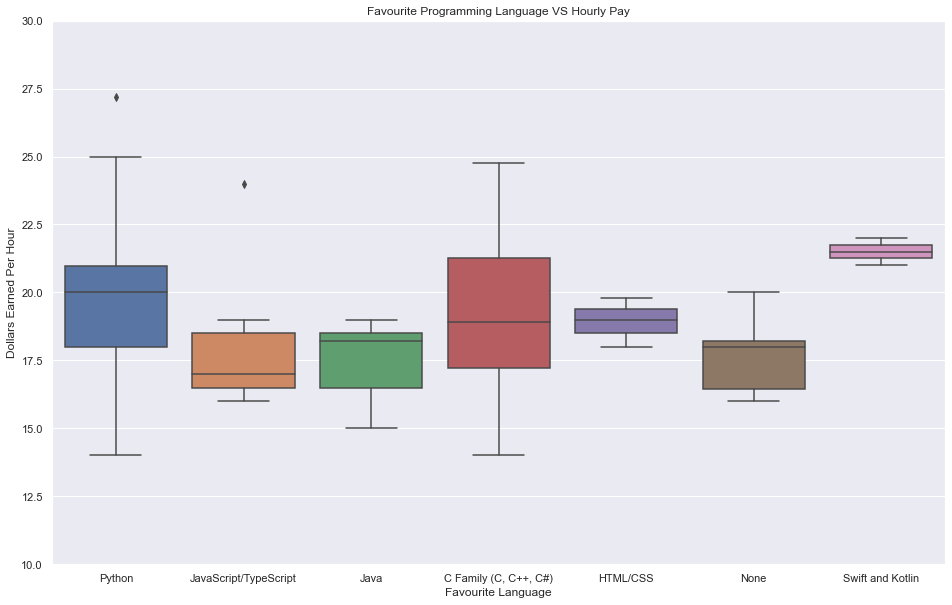

In [19]:
sns.set(rc={'figure.figsize':(16,10)})
ax = sns.boxplot(x='What is your favourite programming language?',
                 y='What is your salary (in CAD/h, do not include "$")?',
                 data = lang_pay)
ax.set_ylabel("Dollars Earned Per Hour")
ax.set_xlabel("Favourite Language")
ax.set_title("Favourite Programming Language VS Hourly Pay")

ax.set(ylim=(10,30))